In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn import metrics
import numpy as np

In [27]:
diabetesData = load_diabetes(as_frame=True)
diaDF = diabetesData.frame
diaDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
print(diabetesData.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [29]:
# 0.00 a 0.19 - correlação bem fraca
# 0.20 a 0.39 - correlação fraca
# 0.40 a 0.69 - correlação moderada
# 0.70 a 0.89 - correlação forte
corr = diaDF.corr()
corr[['target']]

,target
age,0.187889
sex,0.043062
bmi,0.586450
bp,0.441482
s1,0.212022
s2,0.174054
s3,-0.394789
s4,0.430453
s5,0.565883
s6,0.382483


In [30]:
moderateCorr = corr.target[(corr.target.abs() > 0.4) & (corr.target.abs() < 1)]
moderateCorr

bmi    0.586450
bp     0.441482
s4     0.430453
s5     0.565883
Name: target, dtype: float64

In [31]:
Xs = moderateCorr.index
Xs

Index(['bmi', 'bp', 's4', 's5'], dtype='object')

In [32]:
y = diaDF[['target']]

In [42]:
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(diaDF[["bmi"]], diaDF.target, test_size=0.2)

In [43]:
regr = LinearRegression()
regr.fit(X_train_dia, y_train_dia)
regr.score(X_test_dia, y_test_dia)

0.3619562365864709

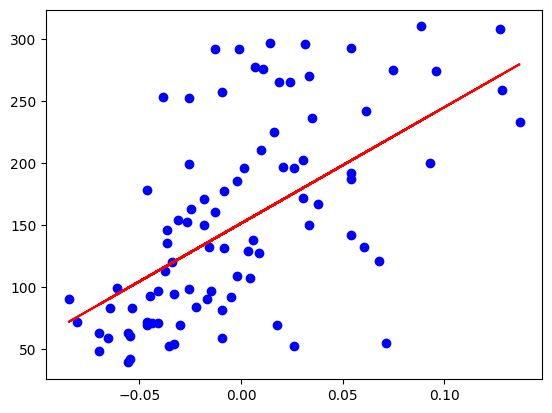

In [45]:
y_pred = regr.predict(X_test_dia)

plt.scatter(X_test_dia, y_test_dia, color="blue")
plt.plot(X_test_dia, y_pred, color="red")
plt.show()


In [48]:
# Cálculo de MSE (Mean Squared Error), MAE (Mean Absolute Error) e RMSE (Root Mean Square Error)
print('MAE: ', metrics.mean_absolute_error(y_test_dia, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test_dia, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_dia, y_pred)))

MAE:  50.91843280950068
MSE:  4047.0498087835317
RMSE: 63.616427192852726
